In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv("stock.csv", parse_dates = ["Date"])

In [3]:
prices.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [4]:
stock=pd.DataFrame()
stock["Date"] = prices["Date"]
stock["Apple"] = prices["Adj Close Price"]

In [5]:
# Short term Simple Moving Average : 30 days
stock["SMA30"] = stock["Apple"].rolling(30).mean()

# long term Simple Moving Average : 100 days
stock["SMA100"] = stock["Apple"].rolling(100).mean()

In [6]:
stock.head(110)

,Date,Apple,SMA30,SMA100
0,2014-05-27,80.948952,NaN,NaN
1,2014-05-28,80.739334,NaN,NaN
2,2014-05-29,82.210480,NaN,NaN
3,2014-05-30,81.902557,NaN,NaN
4,2014-06-02,81.339699,NaN,NaN
...,...,...,...,...
105,2014-10-23,95.418404,91.419804,88.381603
106,2014-10-24,95.773392,91.527816,88.505018
107,2014-10-27,95.673256,91.633402,88.624158
108,2014-10-28,97.156906,91.811804,88.760437


In [7]:
def buy_sell(df):
    buy_signal_price=[]
    sell_signal_price=[]
    holding=[]
    action=[]
    sig=0
    for i, row in stock.iterrows():
        if row["SMA30"]>row["SMA100"]:
            holding.append(1)
            if sig!=1:
                buy_signal_price.append(row["Apple"])
                sell_signal_price.append(np.nan)
                sig=1
                action.append(sig)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                action.append(0)
        elif row["SMA30"] < row["SMA100"]:
            holding.append(0)
            if sig!=-1:
                sell_signal_price.append(row["Apple"])
                buy_signal_price.append(np.nan)
                sig=-1
                action.append(sig)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                action.append(0)
        else:
                holding.append(0)
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                action.append(0)
    return buy_signal_price, sell_signal_price, holding, action

                

In [8]:
buysell=buy_sell(stock)

In [9]:
pd.options.display.max_rows = None

In [10]:
stock["Buy Price"] = buysell[0]
stock["Sell Price"] = buysell[1]
stock["Hold"] = buysell[2]
stock["Actions"] = buysell[3]

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


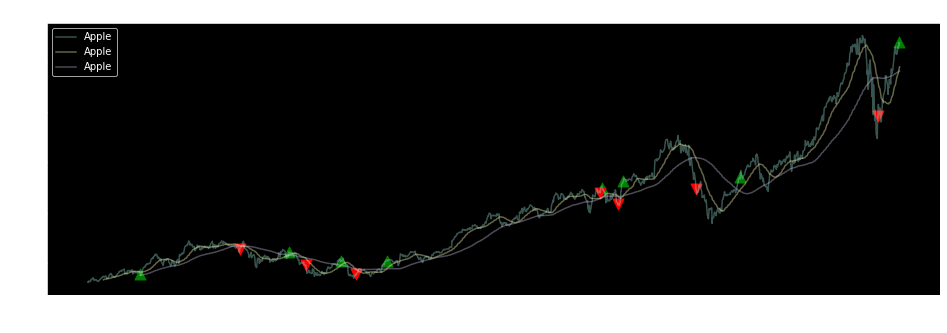

In [12]:
plt.figure(figsize=(16,5))
plt.style.use("dark_background")
plt.plot(stock["Date"],stock["Apple"],label="Apple",alpha=0.4)#alpha is use for transperency between the graph line
plt.plot(stock["Date"],stock["SMA30"],label="Apple",alpha=0.4)
plt.plot(stock["Date"],stock["SMA100"],label="Apple",alpha=0.4)

plt.scatter(stock["Date"],stock["Buy Price"], color="green",marker="^",s=120)#s is size of marker
plt.scatter(stock["Date"],stock["Sell Price"], color="red",marker="v",s=120)#s is size of marker

plt.title("Apple Historical Adj Close Price")
plt.xlabel("From 27 May 2014 to 22 May 2020")
plt.ylabel("Adj Close Price")

plt.legend()
plt.show()


